# PROJECT 2 - STOCK MARKET API PROJECT

In [5]:
%pip install python-dotenv plotly nbformat

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Load the API key from .env file

In [6]:
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
import os
api_key = os.getenv("API_KEY")

### 1. Get the vompany stock symbol

In [8]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"datatype":"json","keywords":"State Bank Of India","function":"SYMBOL_SEARCH"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

response.json()

{'bestMatches': [{'1. symbol': 'SBIN.BSE',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'India/Bombay',
   '5. marketOpen': '09:15',
   '6. marketClose': '15:30',
   '7. timezone': 'UTC+5.5',
   '8. currency': 'INR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBKFF',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'United States',
   '5. marketOpen': '09:30',
   '6. marketClose': '16:00',
   '7. timezone': 'UTC-04',
   '8. currency': 'USD',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SID.FRK',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'Frankfurt',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UTC+02',
   '8. currency': 'EUR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBID.LON',
   '2. name': 'State Bank of India GDR',
   '3. type': 'Equity',
   '4. region': 'United Kingdom',
   '5. marketOpen': '08:00',
   '6. marketClose': '16:30',
   '7. timez

### Get daily stock details for SBIN.BSE

In [9]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"function":"TIME_SERIES_DAILY","symbol":"SBIN.BSE","outputsize":"compact","datatype":"json"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data = response.json()

In [10]:
data

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'SBIN.BSE',
  '3. Last Refreshed': '2025-02-11',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2025-02-11': {'1. open': '738.1500',
   '2. high': '740.0000',
   '3. low': '726.9000',
   '4. close': '731.0000',
   '5. volume': '826170'},
  '2025-02-10': {'1. open': '740.5500',
   '2. high': '744.0500',
   '3. low': '733.6000',
   '4. close': '736.8500',
   '5. volume': '788061'},
  '2025-02-07': {'1. open': '761.8000',
   '2. high': '761.8000',
   '3. low': '732.0500',
   '4. close': '737.0500',
   '5. volume': '1805880'},
  '2025-02-06': {'1. open': '769.6500',
   '2. high': '770.9500',
   '3. low': '750.0000',
   '4. close': '752.3500',
   '5. volume': '1384322'},
  '2025-02-05': {'1. open': '780.8000',
   '2. high': '781.6000',
   '3. low': '764.6500',
   '4. close': '766.1000',
   '5. volume': '654303'},
  '2025-02-04': {'1. open': '766.300

In [11]:
data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [12]:
daily = data["Time Series (Daily)"]

In [13]:
import pandas as pd
df = pd.DataFrame(daily).T
df

,1. open,2. high,3. low,4. close,5. volume
2025-02-11,738.1500,740.0000,726.9000,731.0000,826170
2025-02-10,740.5500,744.0500,733.6000,736.8500,788061
2025-02-07,761.8000,761.8000,732.0500,737.0500,1805880
2025-02-06,769.6500,770.9500,750.0000,752.3500,1384322
2025-02-05,780.8000,781.6000,764.6500,766.1000,654303
...,...,...,...,...,...
2024-09-24,800.0000,804.1000,796.6500,798.3500,427650
2024-09-23,785.0500,804.9000,785.0000,801.8000,1415077
2024-09-20,794.0500,794.4000,779.5000,781.9000,1481791
2024-09-19,794.1500,801.2500,784.1000,790.3500,402071


In [14]:
df.dtypes

1. open      object
2. high      object
3. low       object
4. close     object
5. volume    object
dtype: object

In [15]:
df = df.astype(float).round(2)

In [16]:
df

,1. open,2. high,3. low,4. close,5. volume
2025-02-11,738.15,740.00,726.90,731.00,826170.0
2025-02-10,740.55,744.05,733.60,736.85,788061.0
2025-02-07,761.80,761.80,732.05,737.05,1805880.0
2025-02-06,769.65,770.95,750.00,752.35,1384322.0
2025-02-05,780.80,781.60,764.65,766.10,654303.0
...,...,...,...,...,...
2024-09-24,800.00,804.10,796.65,798.35,427650.0
2024-09-23,785.05,804.90,785.00,801.80,1415077.0
2024-09-20,794.05,794.40,779.50,781.90,1481791.0
2024-09-19,794.15,801.25,784.10,790.35,402071.0


In [17]:
df.dtypes

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object

In [18]:
# Convert index to datatime
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2025-02-11', '2025-02-10', '2025-02-07', '2025-02-06',
               '2025-02-05', '2025-02-04', '2025-02-03', '2025-01-31',
               '2025-01-30', '2025-01-29', '2025-01-28', '2025-01-27',
               '2025-01-24', '2025-01-23', '2025-01-22', '2025-01-21',
               '2025-01-20', '2025-01-17', '2025-01-16', '2025-01-15',
               '2025-01-14', '2025-01-13', '2025-01-10', '2025-01-09',
               '2025-01-08', '2025-01-07', '2025-01-06', '2025-01-03',
               '2025-01-02', '2025-01-01', '2024-12-31', '2024-12-30',
               '2024-12-27', '2024-12-26', '2024-12-24', '2024-12-23',
               '2024-12-20', '2024-12-19', '2024-12-18', '2024-12-17',
               '2024-12-16', '2024-12-13', '2024-12-12', '2024-12-11',
               '2024-12-10', '2024-12-09', '2024-12-06', '2024-12-05',
               '2024-12-04', '2024-12-03', '2024-12-02', '2024-11-29',
               '2024-11-28', '2024-11-27', '2024-11-26', '2024-11-25',
      

In [19]:
df

,1. open,2. high,3. low,4. close,5. volume
2025-02-11,738.15,740.00,726.90,731.00,826170.0
2025-02-10,740.55,744.05,733.60,736.85,788061.0
2025-02-07,761.80,761.80,732.05,737.05,1805880.0
2025-02-06,769.65,770.95,750.00,752.35,1384322.0
2025-02-05,780.80,781.60,764.65,766.10,654303.0
...,...,...,...,...,...
2024-09-24,800.00,804.10,796.65,798.35,427650.0
2024-09-23,785.05,804.90,785.00,801.80,1415077.0
2024-09-20,794.05,794.40,779.50,781.90,1481791.0
2024-09-19,794.15,801.25,784.10,790.35,402071.0


In [20]:
df.index.name = "Date"

In [21]:
df

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-02-11,738.15,740.00,726.90,731.00,826170.0
2025-02-10,740.55,744.05,733.60,736.85,788061.0
2025-02-07,761.80,761.80,732.05,737.05,1805880.0
2025-02-06,769.65,770.95,750.00,752.35,1384322.0
2025-02-05,780.80,781.60,764.65,766.10,654303.0
...,...,...,...,...,...
2024-09-24,800.00,804.10,796.65,798.35,427650.0
2024-09-23,785.05,804.90,785.00,801.80,1415077.0
2024-09-20,794.05,794.40,779.50,781.90,1481791.0


In [22]:
df.to_csv("SBIPrice.csv")

In [23]:
df.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

### Visulize the data with Candlesrick chart

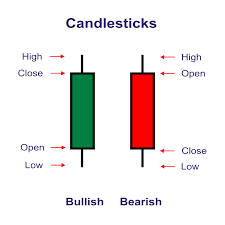

In [24]:
import plotly.graph_objects as go

In [25]:
fig = go.Figure(
    data = [
        go.Candlestick(
            x = df.index,
            open = df["1. open"],
            high = df["2. high"],
            low = df["3. low"],
            close = df["4. close"]
        )
    ]
)
fig.update_layout(width=1200, height=800)

fig.show()

### Create a class to get stock details for any stock

In [29]:
class StockAPI:

    def __init__(self):
        self.url = "https://alpha-vantage.p.rapidapi.com/query"
        self.headers = {
            "x-rapidapi-key": os.getenv("API_KEY"),
            "x-rapidapi-host": "alpha-vantage.p.rapidapi.com",
        }

    def search_symbol(self, company_name):
        querystring = {
            "datatype": "json",
            "keywords": company_name,
            "function": "SYMBOL_SEARCH",
        }
        response = requests.get(self.url, headers=self.headers, params=querystring)
        return response.json()

    def get_stock_data(self, symbol):
        querystring = {
            "function": "TIME_SERIES_DAILY",
            "symbol": symbol,
            "outputsize": "compact",
            "datatype": "json",
        }
        response = requests.get(url, headers=self.headers, params=querystring)
        data = response.json()["Time Series (Daily)"]
        df = pd.DataFrame(data).T
        df = df.astype(float).round(2)
        df.index = pd.to_datetime(df.index)
        df.index.name = "Date"
        return df

    def plot_candlestick(self, df):
        fig = go.Figure(
            data=[
                go.Candlestick(
                    x=df.index,
                    open=df["1. open"],
                    high=df["2. high"],
                    low=df["3. low"],
                    close=df["4. close"],
                )
            ]
        )
        fig.update_layout(width=1200, height=800)
        fig.show()

In [30]:
client = StockAPI()

In [31]:
client.search_symbol(company_name="HDFC BANK")

{'bestMatches': [{'1. symbol': 'HDB',
   '2. name': 'HDFC Bank Ltd',
   '3. type': 'Equity',
   '4. region': 'United States',
   '5. marketOpen': '09:30',
   '6. marketClose': '16:00',
   '7. timezone': 'UTC-04',
   '8. currency': 'USD',
   '9. matchScore': '0.8182'},
  {'1. symbol': 'HDFCBANK.BSE',
   '2. name': 'HDFC Bank Limited',
   '3. type': 'Equity',
   '4. region': 'India/Bombay',
   '5. marketOpen': '09:15',
   '6. marketClose': '15:30',
   '7. timezone': 'UTC+5.5',
   '8. currency': 'INR',
   '9. matchScore': '0.8000'},
  {'1. symbol': 'H1DB34.SAO',
   '2. name': 'HDFC Bank Limited',
   '3. type': 'Equity',
   '4. region': 'Brazil/Sao Paolo',
   '5. marketOpen': '10:00',
   '6. marketClose': '17:30',
   '7. timezone': 'UTC-03',
   '8. currency': 'BRL',
   '9. matchScore': '0.6923'},
  {'1. symbol': 'HDFA.FRK',
   '2. name': 'HDFC Bank Limited',
   '3. type': 'Equity',
   '4. region': 'Frankfurt',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UT

In [32]:
df2 = client.get_stock_data(symbol="HDFCBANK.BSE")

In [33]:
df2

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-02-11,1706.00,1710.55,1688.20,1699.90,395827.0
2025-02-10,1715.30,1723.75,1708.90,1715.40,189950.0
2025-02-07,1750.55,1767.40,1725.10,1732.10,368361.0
2025-02-06,1735.35,1747.45,1724.05,1744.70,166115.0
2025-02-05,1731.05,1744.00,1718.70,1737.50,229559.0
...,...,...,...,...,...
2024-09-26,1778.80,1787.80,1768.10,1782.30,327890.0
2024-09-25,1762.65,1787.90,1760.90,1778.85,3498766.0
2024-09-24,1764.00,1781.80,1754.00,1768.45,249810.0


In [34]:
df2.to_csv("HDFCPrice.csv")

In [35]:
client.plot_candlestick(df2)

### Get the details for Tesla stock from US

In [36]:
client.search_symbol(company_name="Tesla")

{'bestMatches': [{'1. symbol': 'TSLA',
   '2. name': 'Tesla Inc',
   '3. type': 'Equity',
   '4. region': 'United States',
   '5. marketOpen': '09:30',
   '6. marketClose': '16:00',
   '7. timezone': 'UTC-04',
   '8. currency': 'USD',
   '9. matchScore': '0.8889'},
  {'1. symbol': 'TL0.DEX',
   '2. name': 'Tesla Inc',
   '3. type': 'Equity',
   '4. region': 'XETRA',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UTC+02',
   '8. currency': 'EUR',
   '9. matchScore': '0.7143'},
  {'1. symbol': 'TL0.FRK',
   '2. name': 'Tesla Inc',
   '3. type': 'Equity',
   '4. region': 'Frankfurt',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UTC+02',
   '8. currency': 'EUR',
   '9. matchScore': '0.7143'},
  {'1. symbol': 'TSLA34.SAO',
   '2. name': 'Tesla Inc',
   '3. type': 'Equity',
   '4. region': 'Brazil/Sao Paolo',
   '5. marketOpen': '10:00',
   '6. marketClose': '17:30',
   '7. timezone': 'UTC-03',
   '8. currency': 'BRL',
   '9. ma

In [37]:
df3 = client.get_stock_data(symbol="TSLA")

In [38]:
df3

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-02-11,345.80,349.37,325.10,328.50,118543400.0
2025-02-10,356.21,362.70,350.51,350.73,77514903.0
2025-02-07,370.19,380.55,360.34,361.62,70298258.0
2025-02-06,373.03,375.40,363.18,374.32,77918230.0
2025-02-05,387.51,388.39,375.53,378.17,57614721.0
...,...,...,...,...,...
2024-09-24,254.08,257.19,249.05,254.27,88490999.0
2024-09-23,242.61,250.00,241.92,250.00,86927194.0
2024-09-20,241.52,243.99,235.92,238.25,99879070.0


In [39]:
client.plot_candlestick(df3)

### S